In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models 
from sklearn.metrics import confusion_matrix

In [5]:
# Load and preprocess MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [6]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

e:\anaconda\envs\sem8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# compile the model
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
# Train the model
model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.8531 - loss: 0.4668 - val_accuracy: 0.9840 - val_loss: 0.0540
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9811 - loss: 0.0607 - val_accuracy: 0.9842 - val_loss: 0.0549
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9870 - loss: 0.0418 - val_accuracy: 0.9893 - val_loss: 0.0360
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9912 - loss: 0.0267 - val_accuracy: 0.9897 - val_loss: 0.0360
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9912 - loss: 0.0255 - val_accuracy: 0.9905 - val_loss: 0.0344


In [9]:
# Evaluate the model
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print("Test Accuracy : ",test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.9914 - loss: 0.0273
Test Accuracy :  0.9914000034332275


In [10]:
# make predictions
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred,axis=1)
y_true_labels = np.argmax(y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_labels,y_pred_label)
print("Confusion Matrix : ")
print(conf_matrix)

Confusion Matrix : 
[[ 976    0    0    0    0    0    1    2    1    0]
 [   3 1123    1    1    0    1    1    5    0    0]
 [   2    0 1023    2    0    0    0    5    0    0]
 [   0    0    2 1004    0    4    0    0    0    0]
 [   0    0    0    0  977    0    4    0    0    1]
 [   2    0    1    7    0  877    1    1    1    2]
 [   3    3    0    0    1    1  950    0    0    0]
 [   0    1    2    0    0    0    0 1024    0    1]
 [   2    0    1    2    1    0    1    2  960    5]
 [   1    0    0    0    4    2    0    2    0 1000]]


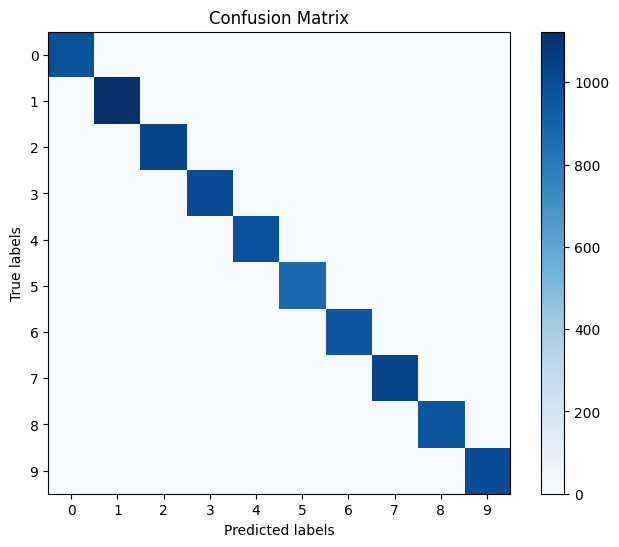

In [12]:
# visualize confusion matrix 
plt.figure(figsize=(8,6))
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()